<a href="https://colab.research.google.com/github/Ike-G/chessTimePrediction/blob/main/chessTimesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import re
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

## Basic

Input data is just the move number. Data trained for is the time it takes for the move to occur.

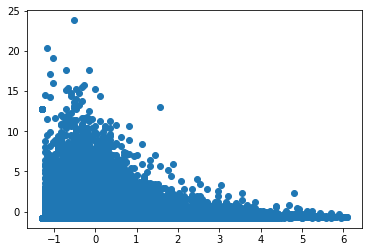

In [ ]:
import matplotlib.pyplot as plt

r = re.compile("(\d+)\s(\d+).*?\n")
T = r.findall(uploaded['times_3_2'].decode('utf-8'))
data = np.array([(float(int(i[0])), float(int(i[1]))) for i in T])
np.random.shuffle(data)

avgs = [np.average(i) for i in data.T]
stds = [np.std(i) for i in data.T]
data = (data - avgs) / stds

m = data.shape[0]
x_train, y_train = data[:(m*7)//10, 0], data[:(m*7)//10, 1]
x_test, y_test = data[(m*7)//10:(m*9)//10, 0], data[(m*7)//10:(m*9)//10, 1]
x_cv, y_cv = data[(m*9)//10:, 0], data[(m*9)//10:, 1]

plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=8)
model.evaluate(x_test, y_test)

Epoch 1/8
4118/4118 [==============================] - 4s 949us/step - loss: 1.6688 - accuracy: 0.0000e+00
Epoch 2/8
4118/4118 [==============================] - 4s 991us/step - loss: 1.0192 - accuracy: 0.0000e+00
Epoch 3/8
4118/4118 [==============================] - 4s 954us/step - loss: 0.9986 - accuracy: 0.0000e+00
Epoch 4/8
4118/4118 [==============================] - 4s 954us/step - loss: 0.9873 - accuracy: 0.0000e+00
Epoch 5/8
4118/4118 [==============================] - 4s 979us/step - loss: 0.9930 - accuracy: 0.0000e+00
Epoch 6/8
4118/4118 [==============================] - 4s 1ms/step - loss: 0.9921 - accuracy: 0.0000e+00
Epoch 7/8
4118/4118 [==============================] - 4s 1ms/step - loss: 0.9927 - accuracy: 0.0000e+00
Epoch 8/8
1177/1177 [==============================] - 1s 873us/step - loss: 0.9768 - accuracy: 0.0000e+00


[0.9767584800720215, 0.0]

In [ ]:
tupleRegex = re.compile(r"\((-?\d+),\s(-?\d+),\s(-?\d+),\s(-?\d+),\s(-?\d+),\s(-?\d+),\s(\d+),\s(\d+)\)")
rData = uploaded['basicFeatures_3_2'].decode('utf-8').split('\n')[:-1]
data = np.array([[float(j) for j in tupleRegex.match(i).groups()] for i in rData])
np.random.shuffle(data)

avgs = [np.average(i) for i in data.T]
stds = [np.std(i) for i in data.T]
data = (data - avgs) / stds

m = data.shape[0]
x_train, y_train = data[:(m*7)//10, 1:], data[:(m*7)//10, 1]
x_test, y_test = data[(m*7)//10:(m*9)//10, 1:], data[(m*7)//10:(m*9)//10, 1]
x_cv, y_cv = data[(m*9)//10:, 1:], data[(m*9)//10:, 1]

print(x_train.shape)
print(data[:8])

(128844, 7)
[[-0.6597855   1.79553914 -1.64279507 -0.33592204 -1.3738453  -0.04892073
   1.46478571  1.33900467]
 [ 1.89842359 -0.95409697  0.93612554 -0.18658053  1.07962592 -0.34791944
  -1.28519966 -1.50012356]
 [-0.6597855  -0.89015195  1.20406535 -0.63460505  1.1797676  -0.64691816
   0.63867373  0.30828577]
 [-0.50930261 -0.76226189  0.91937931  0.560127    0.87934255  0.39957735
  -0.70468854  0.1073514 ]
 [-0.05785395 -1.2738221   1.07009545 -0.78394656  1.0963162  -0.79641752
  -0.13534109 -0.26474928]
 [-0.05785395 -0.57042682  0.01508247  0.85881001 -0.12207427  2.19356964
   0.61634638  0.94829895]
 [-0.6597855  -1.018042    1.1370804  -0.63460505  1.16307732 -0.64691816
   0.32981205  0.4868941 ]
 [-0.35881972 -1.20987708  0.98636426  0.26144398  1.0963162  -0.4974188
   0.31492715  1.07109217]]


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(32, kernel_initializer='normal', input_shape=(x_train.shape[1],) ,activation='relu'),
                                    tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
                                    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']
)
model.summary()
model.fit(x_train, y_train, epochs=16)
model.evaluate(x_test, y_test)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/16
4027/4027 [==============================] - 6s 1ms/step - loss: 0.0639 - mean_absolute_error: 0.0825
Epoch 2/16
4027/4027 [==============================] - 5s 1ms/step - loss: 5.0460e-05 - mean_absolute_error: 0.0048
Epoch 3/16
4027/4027 [==============================] - 5s 1ms/step - loss: 8.0229e-05 - mean_absolute_error: 0.0047
Epoch 4/16
4027/4027 [============

[1.6210457260967814e-06, 0.0009966612560674548]

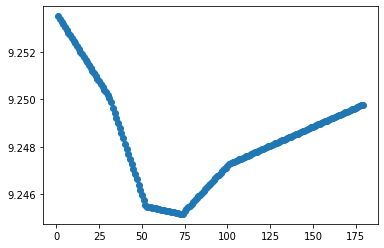

In [ ]:
tData = np.array([((np.array([5, 30, i, 5, 5, 3, 1600, 1600]) - avgs) / stds)[1:] for i in range(1, 180)])
plt.scatter([i for i in range(1,180)], model(tData)*stds[0]+avgs[0])
plt.show()